# Exploratory Data Analysis (EDA) for Telecom Churn Dataset

This notebook explores and analyzes the telecom churn dataset. The goal is to clean the data, visualize important patterns, and understand potential predictors of customer churn.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Data
Upload telecom_churn.csv from user's machine

In [3]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn (1).csv


## Data Overview

We examine the first few rows and general information to understand the structure and types of features.

In [4]:
df = pd.read_csv('telecom_churn.csv')
df.head()
df.info()
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## 🧹 Data Cleaning: Remove Identifiers and Handle Missing Values



In [12]:
if 'customerID' in df.columns:
  df.drop('customerID', axis=1, inplace=True)
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Target Variable Analysis

<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn'>

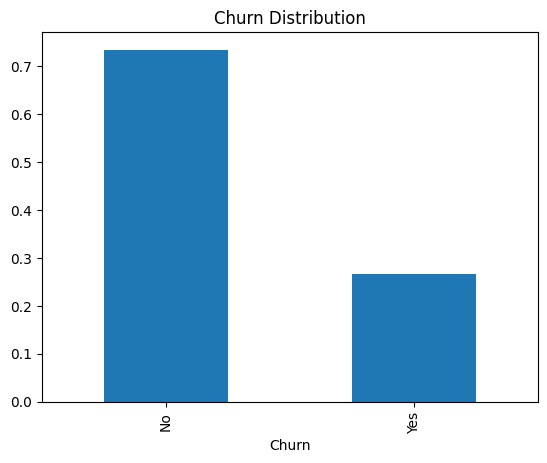

In [13]:
df['Churn'].value_counts(normalize=True).plot(kind='bar', title='Churn Distribution')

#Outliers and Target Relation

We use boxplots to observe how each feature differs across churn classes.

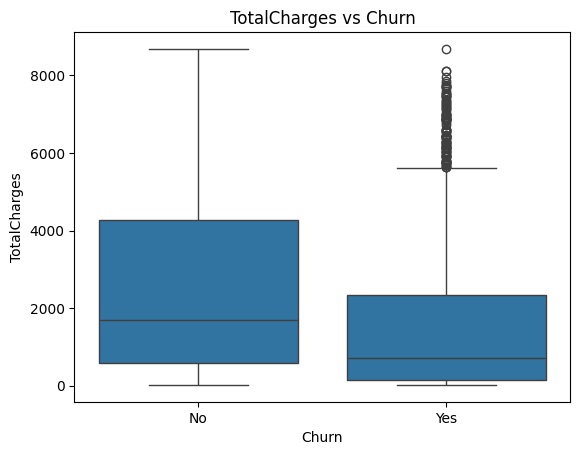

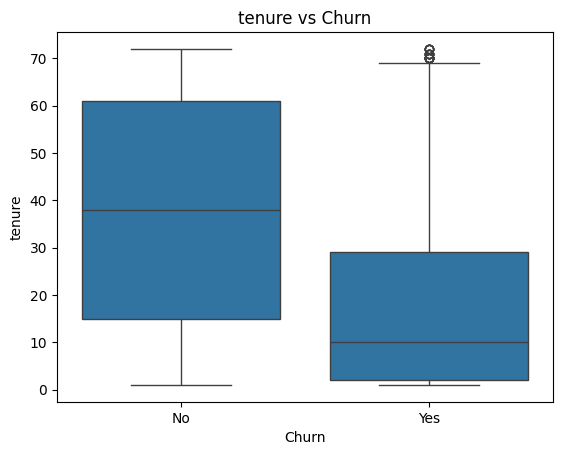

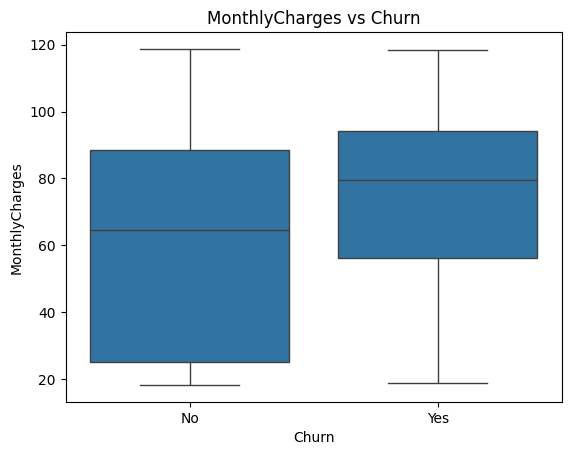

In [14]:
num_cols = ['TotalCharges', 'tenure', 'MonthlyCharges']
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

#Numerical Features

In [16]:
# Descriptive statistics
df.describe(percentiles=[.01, .25, .5, .75, .99])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
1%,0.000000,1.000000,19.200000,19.900000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
99%,1.000000,72.000000,114.734500,8039.883000
max,1.000000,72.000000,118.750000,8684.800000


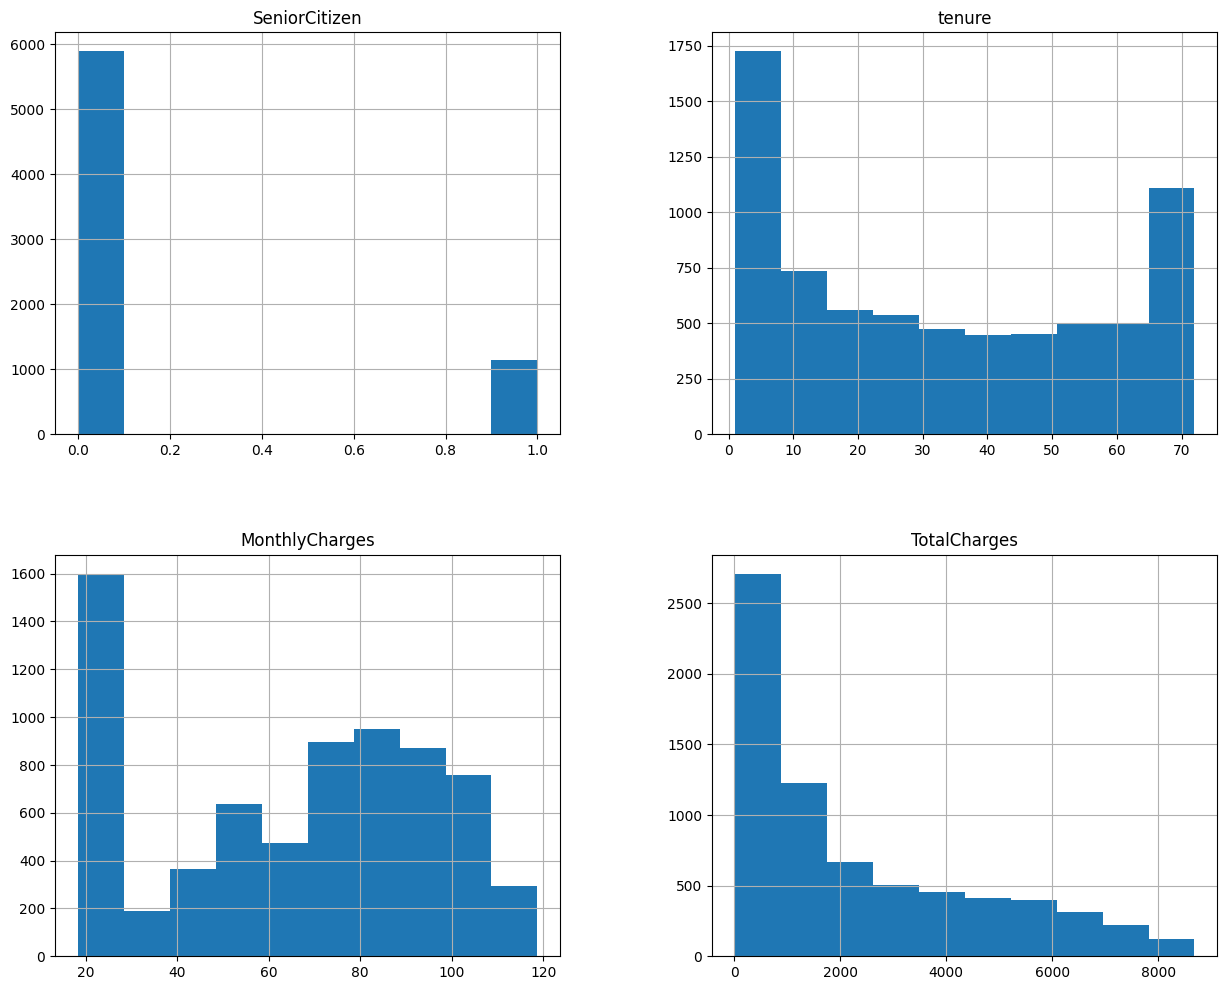

In [17]:
# Histograms for all numerical features
df.hist(figsize=(15, 12));

#Categorical Features


In [18]:
# Cardinality check
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

,0
PaymentMethod,4
OnlineBackup,3
InternetService,3
OnlineSecurity,3
TechSupport,3
StreamingTV,3
DeviceProtection,3
MultipleLines,3
StreamingMovies,3
Contract,3


# Encode categorical features

In [ ]:
# Encode categorical features

In [28]:
for col in df.select_dtypes(include=['object']).columns:
  if col != 'Churn':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

#Feature Relationships

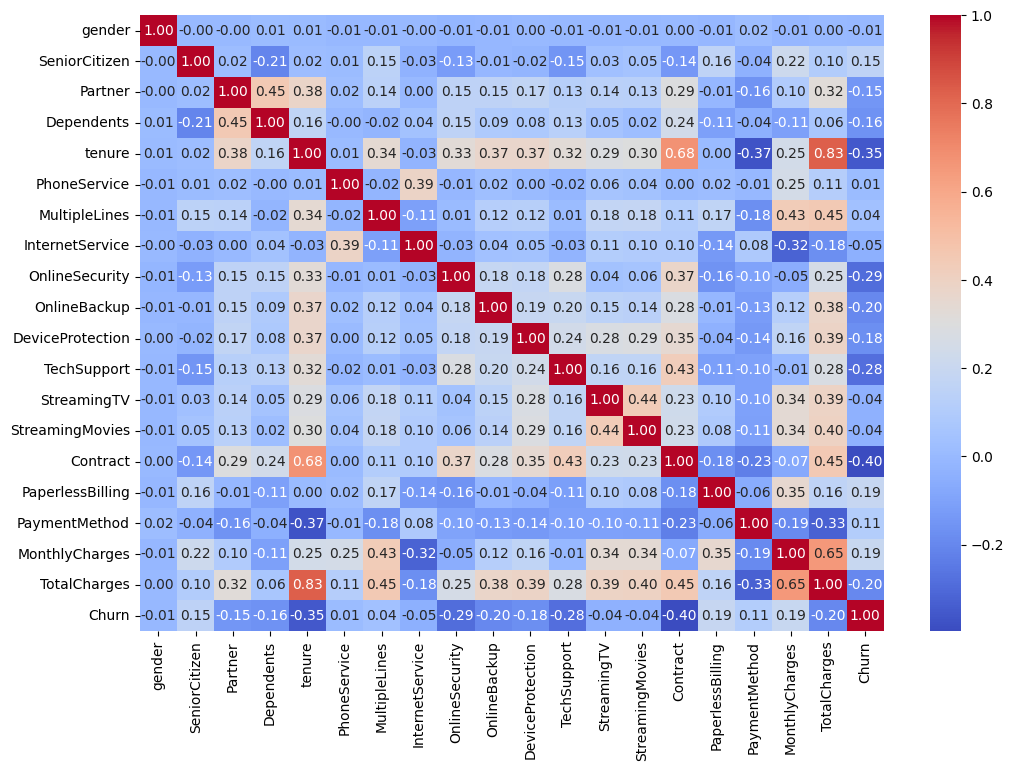

In [29]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=np.number) # Select only numerical columns
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

#High-Dimensional Visualisation

Text(0.5, 1.0, 'PCA of Numerical Features')

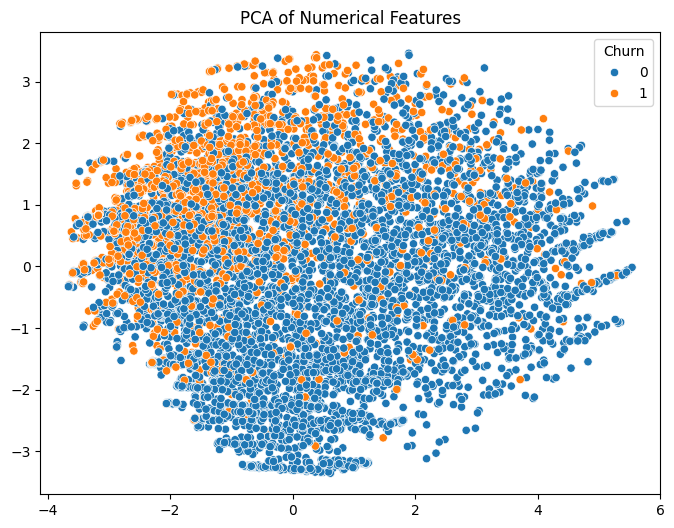

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.select_dtypes(include=np.number).drop(columns=['Churn'], errors='ignore')
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Churn'])
plt.title('PCA of Numerical Features')

#Hunt for Potential Leakage

In [27]:
# Check correlation with target
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
correlations = df.corr()['Churn'].sort_values(ascending=False)
correlations

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802
